Dataset Sample:
   CustomerID  AnnualIncome  SpendingScore
0           1         71422             42
1           2         30795             45
2           3         15860             62
3           4         53158             57
4           5         69343              6


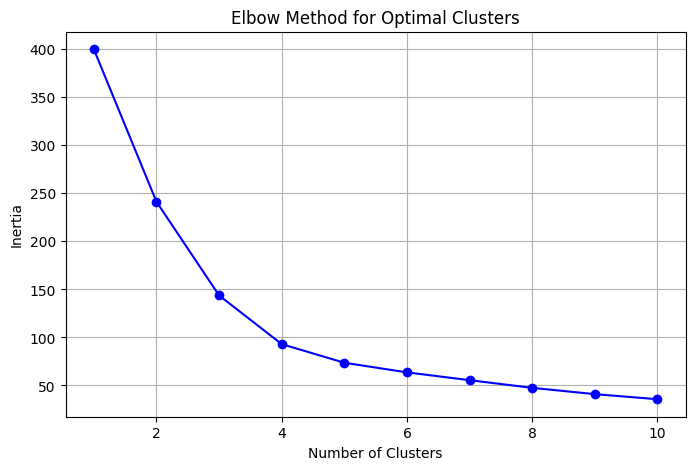

Cluster Centers:
[[-0.86836494 -0.85813959]
 [ 0.98781412  0.76949921]
 [-0.78653485  0.99327176]
 [ 0.9217261  -0.79361262]]

Cluster Summary:
         CustomerID  AnnualIncome  SpendingScore
Cluster                                         
0        102.377358  28425.679245      24.132075
1         94.309524  63212.380952      72.238095
2         91.000000  29959.259259      78.851852
3        113.705882  61973.823529      26.039216


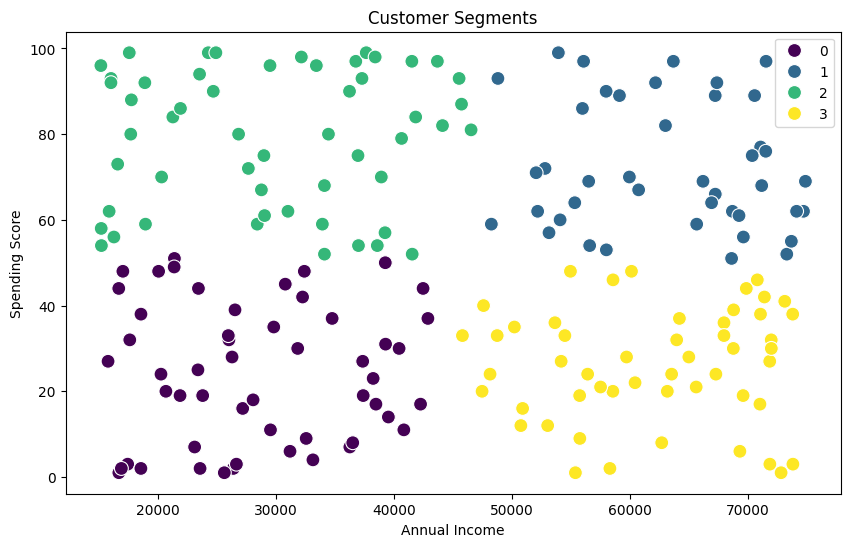

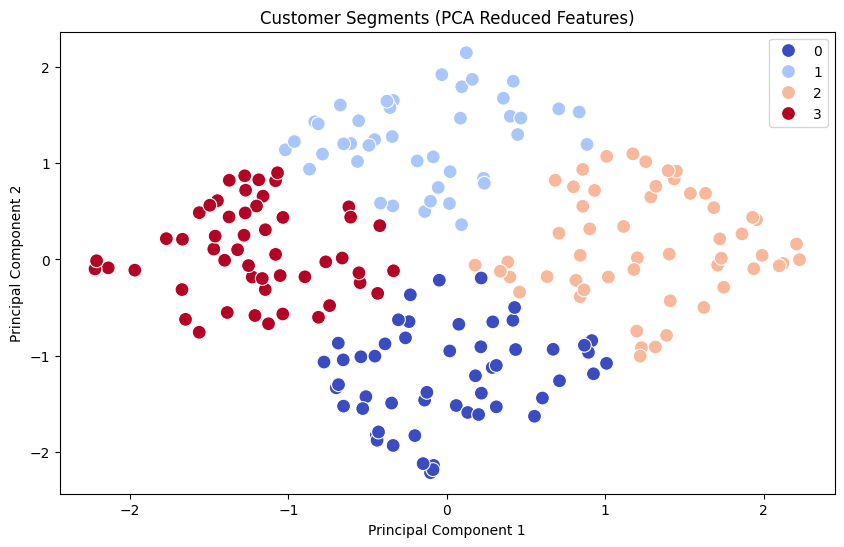

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Load the Dataset
np.random.seed(42)
data = {
    'CustomerID': range(1, 201),
    'AnnualIncome': np.random.randint(15000, 75000, 200),
    'SpendingScore': np.random.randint(1, 100, 200)
}

df = pd.DataFrame(data)
print("Dataset Sample:")
print(df.head())

# Step 2: Data Preprocessing
# Select features for clustering
features = df[['AnnualIncome', 'SpendingScore']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 3: Find Optimal Clusters Using Elbow Method
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, 'o-', color='blue')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Step 4: Apply K-Means Clustering
optimal_clusters = 4  # Based on the Elbow Method graph
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Step 5: Analyze Cluster Characteristics
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Summary statistics by cluster
cluster_summary = df.groupby('Cluster').mean()
print("\nCluster Summary:")
print(cluster_summary)

# Step 6: Visualize Customer Segments
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Customer Segments')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

# Step 7: Apply PCA for Dimensionality Reduction
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)
kmeans_pca = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters_pca = kmeans_pca.fit_predict(reduced_features)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=clusters_pca, palette='coolwarm', s=100)
plt.title('Customer Segments (PCA Reduced Features)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
